### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
* y_score : Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).
* 

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import numpy as np

test_y_df = pd.read_csv("./datasets/titanic_gender_submission.csv")
test_df = pd.read_csv("./datasets/titanic_test.csv")
train_df = pd.read_csv("./datasets/titanic_train.csv")

In [11]:
train = train_df[['Pclass' , 'Sex' , 'Age' ,'Survived']]
test = test_df[['Pclass' , 'Sex' , 'Age' ]]
test_y = test_y_df['Survived']

In [12]:
train = train.dropna(axis=0)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex'] = data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['Age']])
data = scaler.transform(train[['Age']])
train['Age'] = data

from sklearn.linear_model import LogisticRegression
X = train.drop('Survived', axis=1)
y = train['Survived']
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [13]:
# 결측치 제거
test = test.fillna(np.mean(test['Age']))

# 문자를 숫자로 변환
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex'] = data

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test[['Age']])
data = scaler.transform(test[['Age']])
test['Age'] = data

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [15]:
pred = lr.predict(test)
pred_proba = lr.predict_proba(test)
result = pred_proba[ : , 1]

--------------------------------------

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, result)

In [37]:
from  sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X,y)
dt_pred_proba = dt.predict_proba(test)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(test_y, dt_pred_proba[:,1])

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)
rf_pred_proba = rf.predict_proba(test)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_y, rf_pred_proba[:,1])

In [19]:
import matplotlib.pyplot as plt

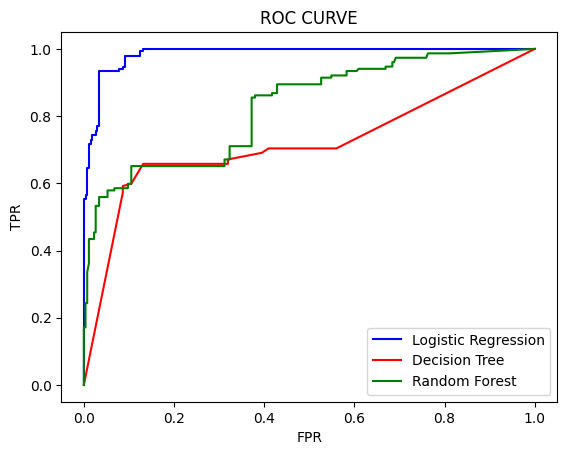

In [42]:
plt.title("ROC CURVE")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.plot(fpr, tpr, "b", label = "Logistic Regression")
plt.plot(dt_fpr, dt_tpr, "r", label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, "g", label = "Random Forest")


plt.legend(loc = "lower right")

plt.show()

### sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [48]:
from sklearn.metrics import roc_auc_score

lr_auc = roc_auc_score(test_y, pred_proba[:,1])
dt_auc = roc_auc_score(test_y, dt_pred_proba[:,1])
rf_auc = roc_auc_score(test_y, rf_pred_proba[:,1])

print(f'regression auc : {lr_auc} \ndecisiontree auc : {dt_auc} \nrandomforest auc : {rf_auc}')

regression auc : 0.9852344677483182 
decisiontree auc : 0.7184161060546101 
randomforest auc : 0.8268574396517611


In [ ]:
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)